In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from collections import defaultdict
from datetime import datetime
import h5py
from kneed import KneeLocator
import math
import matplotlib.pyplot as plt
from neural_analysis.matIO import loadmat
import numpy as np
import os
import pandas as pd
import re
import scipy
from scipy.signal import butter, filtfilt, freqz
import sys
import time
from tqdm.auto import tqdm
import traceback as tb

sys.path.append('../../..')
from ld_utils import compute_eigs, get_data_sigma_norms
from multiproc import compute_correlations
from plot import plot_individual_areas, plot_multipopulation
from up_down import get_up_down
from utils import compute_summary_statistics, get_data_class, get_result_path, load, load_session_data, run_window_selection, save

# Load Neural Data 

In [6]:
session = 'SPOCK_Ketamine_20210909'

In [7]:
all_data_dir = '/om/user/eisenaj/datasets/anesthesia/mat'
data_class = get_data_class(session, all_data_dir)

In [8]:
variables = ['electrodeInfo', 'lfp', 'lfpSchema', 'sessionInfo', 'spikeTimes', 'trialInfo', 'unitInfo']
session_vars, T, N, dt = load_session_data(session, all_data_dir, variables, data_class=data_class, verbose=False)
electrode_info, lfp, lfp_schema, session_info, spike_times, trial_info, unit_info = session_vars['electrodeInfo'], session_vars['lfp'], session_vars['lfpSchema'], session_vars['sessionInfo'], session_vars['spikeTimes'], session_vars['trialInfo'], session_vars['unitInfo']

In [27]:
variables = ['sessionInfo', 'trialInfo']
session_vars, T, N, dt = load_session_data(session, all_data_dir, variables, data_class=data_class, verbose=False)
session_info, trial_info = session_vars['sessionInfo'], session_vars['trialInfo']

(0.945, 1.0550000000000002)


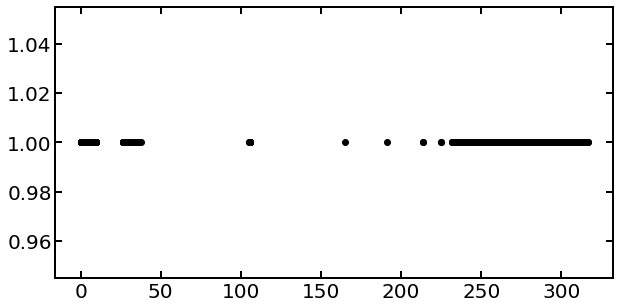

In [39]:
lever_times = trial_info['trialStart'][trial_info['task'] == 'lever']
response = 1 - trial_info['noResponse']
lever_press_times = lever_times[response == 1]
plt.scatter(lever_press_times/60, response[response==1], c='k')
print(plt.gca().get_ylim())
plt.show()

In [9]:
spike_times = spike_times[0]

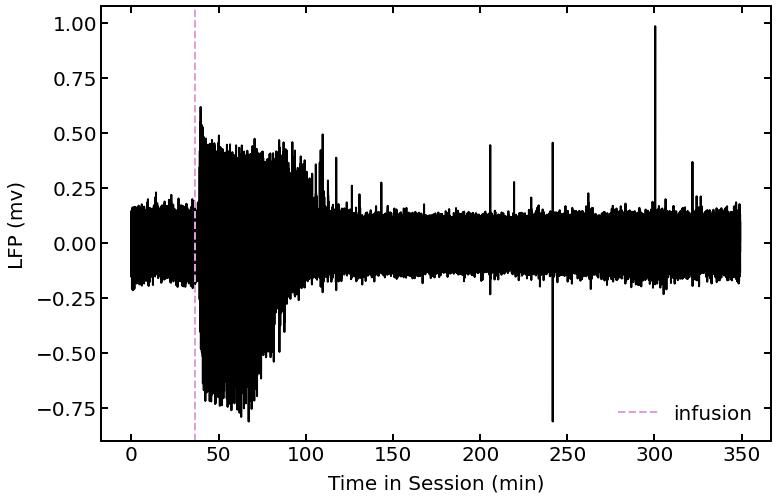

In [25]:
plt.style.use('../../sci_style.py')
plt.figure(figsize=(12, 8))
plt.plot(np.arange(T)*dt/60, lfp[:, 0], c='k')
plt.xlabel('Time in Session (min)')
plt.ylabel('LFP (mv)')
plt.axvline(session_info['infusionStarts']/60, c='plum', linestyle='--', label='infusion')
plt.legend()
plt.show()

# Load VAR Results

In [19]:
VAR_results, window_selection_info = run_window_selection(session, return_data=True, verbose=False)

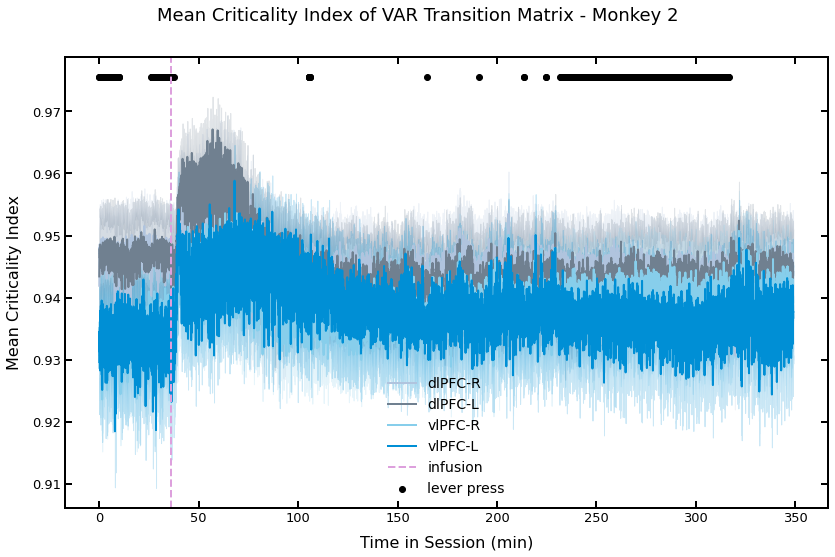

In [40]:
plot_individual_areas(session, data_class, VAR_results, session_info, trial_info)